## Data Cleaning 

You'll notice that this dataset is by no means ready for analysis. We have:

* a numeric column interpreted as a string
* extra columns that are not relevant to our analysis
* multiple rows with missing values
* column names are too long

Let's "clean" our dataset by fixing these errors below.

In [33]:
# import required modules for this project

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# TODO: load in your excel file and print out how many missing values are in each column
df = pd.read_excel ("/Users/emanuelcortes/Desktop/TKH/rental-pricing-prediction-lab/data/raw/realestate.xlsx")

df.isnull().sum()


No                                         0
X2 house age                              11
X3 distance to the nearest MRT station     0
X4 number of convenience stores            1
X5 latitude                                0
X6 longitude                               0
Y house price of unit area                 0
dtype: int64

In [35]:
# TODO: using this dictionary, rename the relevant columns in your dataframe
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html
rename_dict = {
    "X2 house age": "house_age", 
    "X3 distance to the nearest MRT station": "distance_to_mrt", 
    "X4 number of convenience stores": "num_convenience_stores",
    "X5 latitude": "lat",
    "X6 longitude": "long",
    "Y house price of unit area": "price_unit_area"
}

# rename columns
df_rename = df.rename(columns=rename_dict)

df_rename.columns

Index(['No', 'house_age', 'distance_to_mrt', 'num_convenience_stores', 'lat',
       'long', 'price_unit_area'],
      dtype='object')

In [36]:
selected = ["lat", "long", "No"]

# TODO: Drop the above selected columns from your dataframe
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
df_drop = df_rename.drop(columns=selected)

In [43]:
# remove quotes from sample
df_drop["distance_to_mrt"] = df_drop["distance_to_mrt"].str.strip('"')

# TODO: convert the "distance_to_mrt" column to the "float" datatype
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html
df_drop["distance_to_mrt"] = df_drop["distance_to_mrt"].astype(float)

In [44]:
# check current "shape" of dataframe
df_drop.shape

(414, 4)

In [45]:
# TODO: Remove missing values from this dataframe
df.dropna()

# check shape again
df_drop.shape

(414, 4)

## Explore Again

Now that we've cleaned our dataset, let's again explore the relationships & distributions of our dataset. 

Perhaps we missed something "qualitative" about our data that we should remove. 

In [46]:
# TODO: print out the summary statistics (mean, median, max, min, count) of all numeric columns
df.describe(include=[np.number])

,No,X2 house age,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,403.000000,413.000000,414.000000,414.000000,414.000000
mean,207.500000,18.607196,4.283293,24.969030,121.533361,37.980193
std,119.655756,22.656541,5.580361,0.012410,0.015347,13.606488
min,1.000000,0.000000,-6.000000,24.932070,121.473530,7.600000
25%,104.250000,8.700000,1.000000,24.963000,121.528085,27.700000
50%,207.500000,16.100000,4.000000,24.971100,121.538630,38.450000
75%,310.750000,28.300000,6.000000,24.977455,121.543305,46.600000
max,414.000000,410.300000,100.000000,25.014590,121.566270,117.500000


In [50]:
# notice how the minimum value for "num_convenience_stores" is -6
# TODO: how do we have -6 convenience stores? this must be an error, let's remove it
# documentation: https://pandas.pydata.org/docs/user_guide/indexing.html#boolean-indexing
df_outl = df_drop[df_drop.num_convenience_stores >= -6]
df_outl.shape

(413, 4)

In [51]:
# notice how the maximum value for "num_convenience_stores" is 100
# this value does not show up in any other row and represents an extreme outlier
# TODO: this is most likely an error, let's remove it
df_outl = df_outl[df_drop.num_convenience_stores >= 100]
df_outl.shape

/var/folders/hp/5h06y9d537l9chrd99_c2l9w0000gn/T/ipykernel_1693/969703872.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_outl = df_outl[df_drop.num_convenience_stores >= 100]


(1, 4)

In [52]:
# notice how the maximum "house_age" is 410.3 years old 
# not looking at statistics, the oldest house in Taiwan was built in the 17th century (300 years at most)
# TODO: let's remove this value
df_outl = df_outl[df_outl.house_age != 410.3]
df_outl.shape

(1, 4)

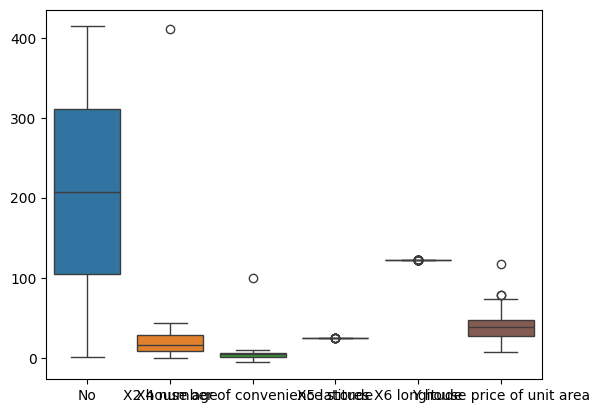

In [139]:
# TODO : plot histograms, boxplots, and barcharts of all available numeric columns. 
# Create as many additional code blocks as needed to present your visualizations.
# article: https://www.statology.org/univariate-analysis-in-python/ 
sns.boxplot(df)
plt.show()

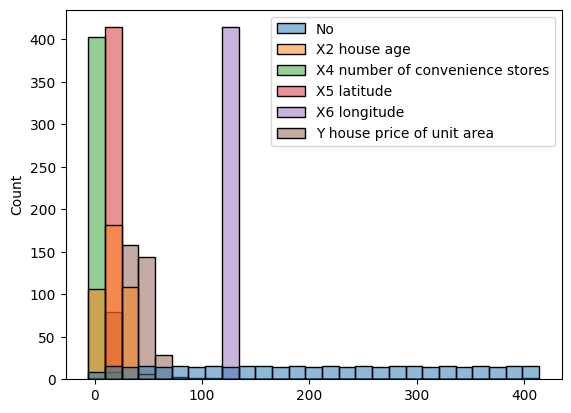

In [142]:
sns.histplot(df)
plt.show()

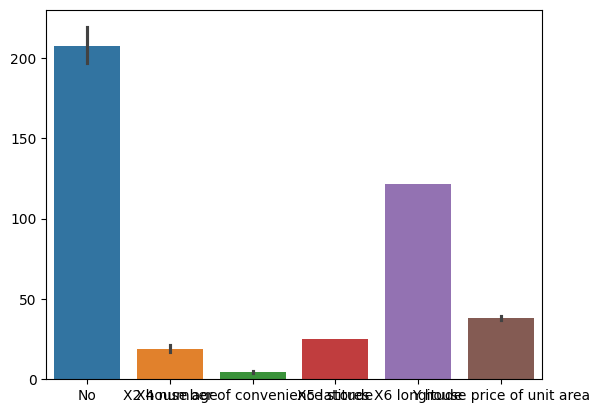

In [144]:
sns.barplot(df)
plt.show()

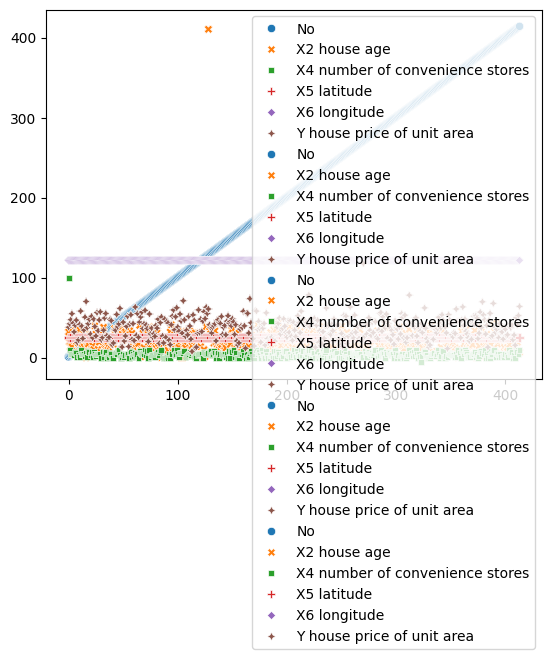

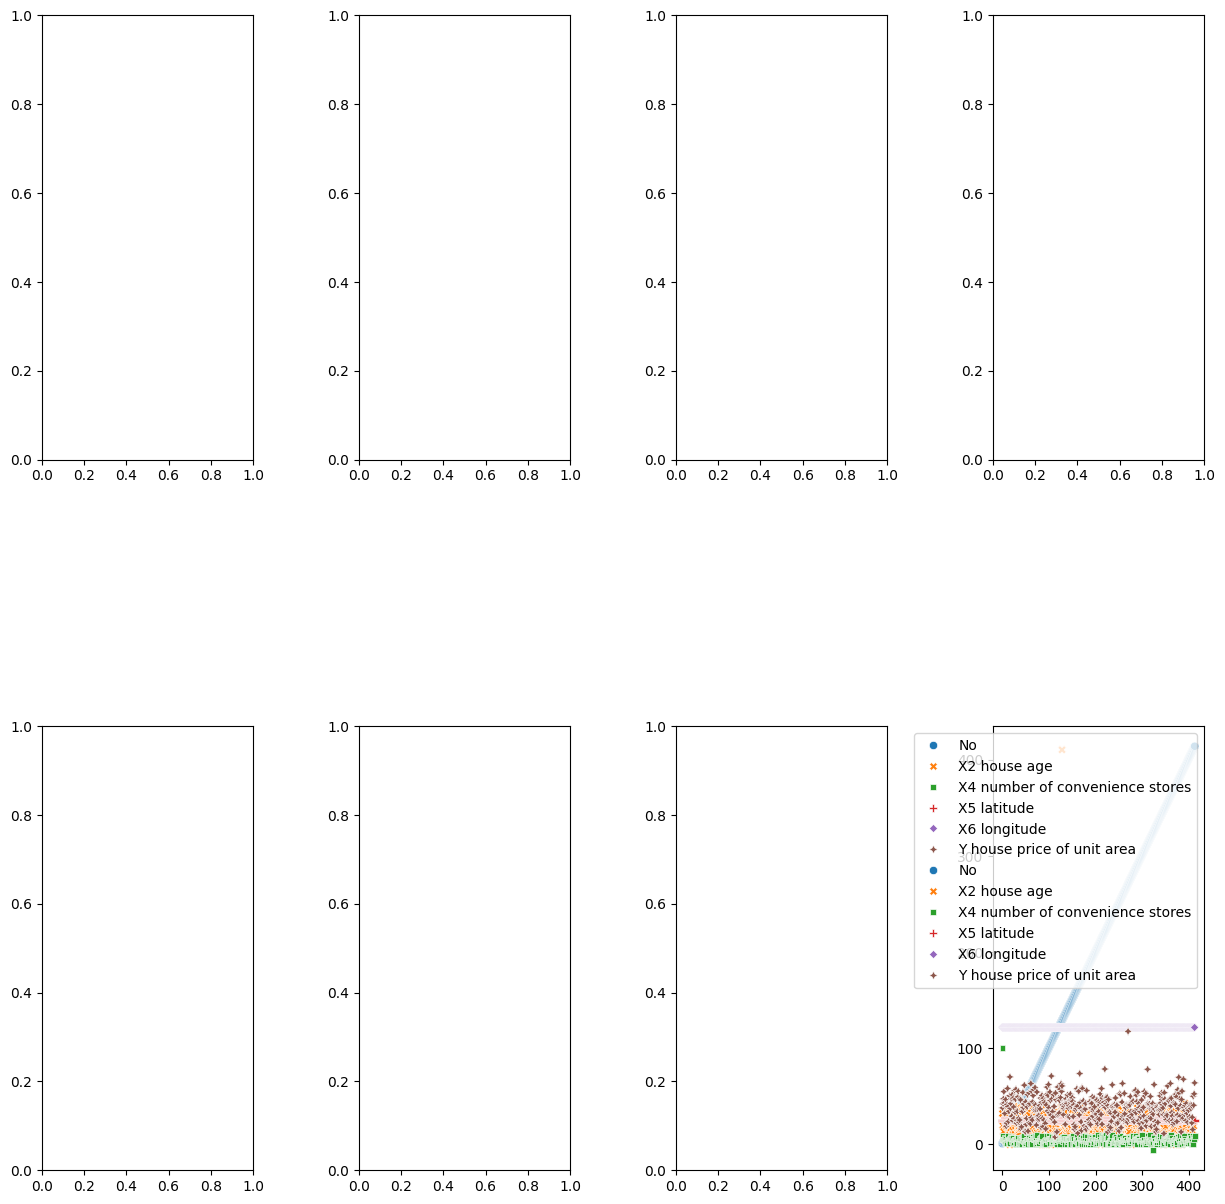

In [160]:
# TODO : plot scatter-plots and other visualizations of all available numeric columns. 
# Create as many additional code blocks as needed to present your visualizations.
# article: https://www.statology.org/bivariate-analysis-in-python/
sns.scatterplot(df)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


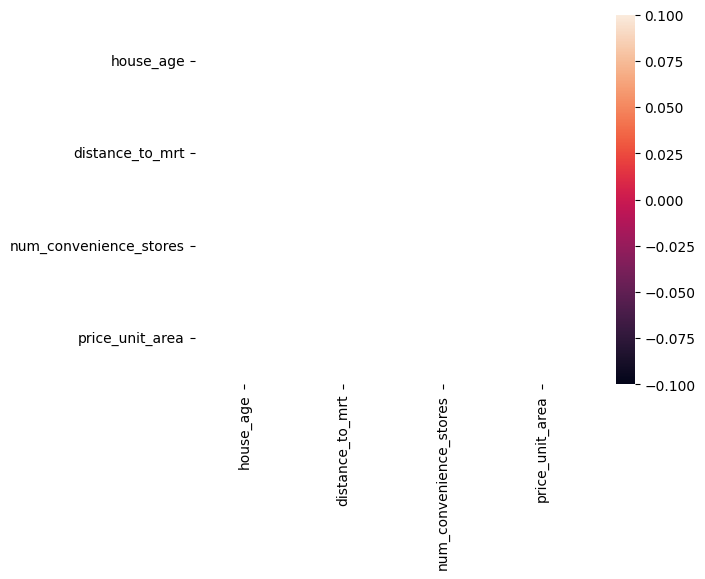

In [176]:
mask = np.triu(np.ones_like(df_outl.corr(), dtype=np.bool_))

sns.heatmap(df_outl.corr(), annot=True, mask=mask)
plt.show()

In [177]:
# TODO: save your transformed dataframe into `data/processed` for modeling
df_drop.to_csv("../../data/processed/tpdata.csv", index=False)